In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Подготовка данных и метрик

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime, timedelta
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('seaborn')

%matplotlib inline

In [ ]:
!pip install -U tapy

In [ ]:
data = (pd.read_csv('/content/gdrive/My Drive/SPX Historical Data.csv')
        .drop(columns=['Volume', 'Open'])
        .rename(columns={'Close/Last': 'Close'})
        .sort_index(ascending=False)
       )

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Weekday'] = data['Date'].dt.weekday+1
data['Month'] = data['Date'].dt.month

data = (data
        .set_index('Date', drop=False)
#         .reset_index(drop=True)
        .reindex(columns=['Date', 'Month', 'Weekday', 'Close', 'Low', 'High'])
       )
data.head()

,Date,Month,Weekday,Close,Low,High
Date,,,,,,
2011-04-25,2011-04-25,4,1,1335.25,1331.47,1337.55
2011-04-26,2011-04-26,4,2,1347.24,1336.75,1349.55
2011-04-27,2011-04-27,4,3,1355.66,1344.25,1357.49
2011-04-28,2011-04-28,4,4,1360.48,1353.60,1361.71
2011-04-29,2011-04-29,4,5,1363.61,1358.69,1364.56


In [ ]:
lag = 30
for i in range(20, 31):
    data["lag_{}".format(i)] = data.loc[:,'Close'].shift(i)

# lag = 2
# data.loc[:,'Yesterday'] = data.loc[:,'Close'].shift()
# data.loc[:,'Yesterday_Diff'] = data.loc[:,'Yesterday'].diff()
# data['Sign_Yesterday_Diff'] = np.sign(data['Yesterday_Diff'])
# data['Log_Yesterday'] = np.log(data['Yesterday'])
data = data.dropna()
data.head()

,Date,Month,Weekday,Close,Low,High,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30
Date,,,,,,,,,,,,,,,,,
2011-06-06,2011-06-06,6,1,1286.17,1284.72,1300.26,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1335.25
2011-06-07,2011-06-07,6,2,1284.94,1284.74,1296.22,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24
2011-06-08,2011-06-08,6,3,1279.56,1277.42,1287.04,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66
2011-06-09,2011-06-09,6,4,1289.00,1279.63,1294.54,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48
2011-06-10,2011-06-10,6,5,1270.98,1268.28,1288.60,1337.77,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61


In [ ]:
# plt.figure(figsize=(16,10))
# plt.plot(data['Yesterday_Diff'], label='Yesterday Difference')
# plt.xlabel('Year', fontsize=16)
# plt.ylabel('Price', fontsize=16)
# plt.legend(fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

In [ ]:
data['SMA_5'] = data['Close'].rolling(window=5, min_periods=1).mean() # Simple Moving Average
data['SMA_10'] = data['Close'].rolling(window=10, min_periods=1).mean()
data['SMA_20'] = data['Close'].rolling(window=20, min_periods=1).mean()
data['SMA_60'] = data['Close'].rolling(window=60, min_periods=1).mean()
data['SMA_120'] = data['Close'].rolling(window=120, min_periods=1).mean()
data['SMA_240'] = data['Close'].rolling(window=240, min_periods=1).mean()
data['CMA'] = data['Close'].expanding().mean() # Cumulative Moving Average
data['EMA_0.05'] = data['Close'].ewm(alpha=0.05, adjust=False).mean() # Exponential Moving Average
data['EMA_0.1'] = data['Close'].ewm(alpha=0.1, adjust=False).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data['EMA_0.5'] = data['Close'].ewm(alpha=0.5, adjust=False).mean()
data.head()

,Date,Month,Weekday,Close,Low,High,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,SMA_5,SMA_10,SMA_20,SMA_60,SMA_120,SMA_240,CMA,EMA_0.05,EMA_0.1,EMA_0.3,EMA_0.5
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-06,2011-06-06,6,1,1286.17,1284.72,1300.26,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1335.25,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000
2011-06-07,2011-06-07,6,2,1284.94,1284.74,1296.22,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1286.108500,1286.047000,1285.801000,1285.555000
2011-06-08,2011-06-08,6,3,1279.56,1277.42,1287.04,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1285.781075,1285.398300,1283.928700,1282.557500
2011-06-09,2011-06-09,6,4,1289.00,1279.63,1294.54,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1285.942021,1285.758470,1285.450090,1285.778750
2011-06-10,2011-06-10,6,5,1270.98,1268.28,1288.60,1337.77,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1285.193920,1284.280623,1281.109063,1278.379375


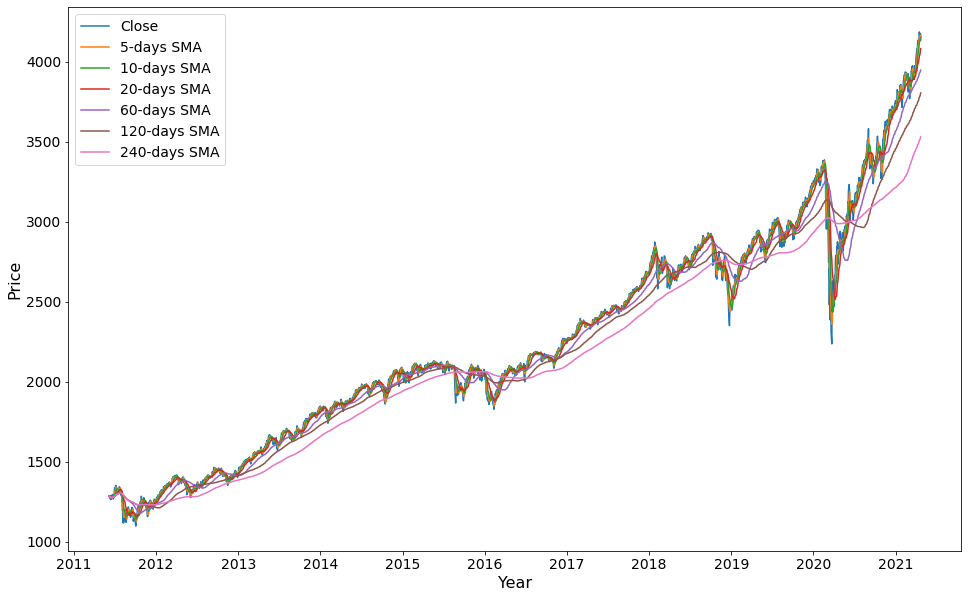

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'], label='Close')
plt.plot(data['SMA_5'], label='5-days SMA')
plt.plot(data['SMA_10'], label='10-days SMA')
plt.plot(data['SMA_20'], label='20-days SMA')
plt.plot(data['SMA_60'], label='60-days SMA')
plt.plot(data['SMA_120'], label='120-days SMA')
plt.plot(data['SMA_240'], label='240-days SMA')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

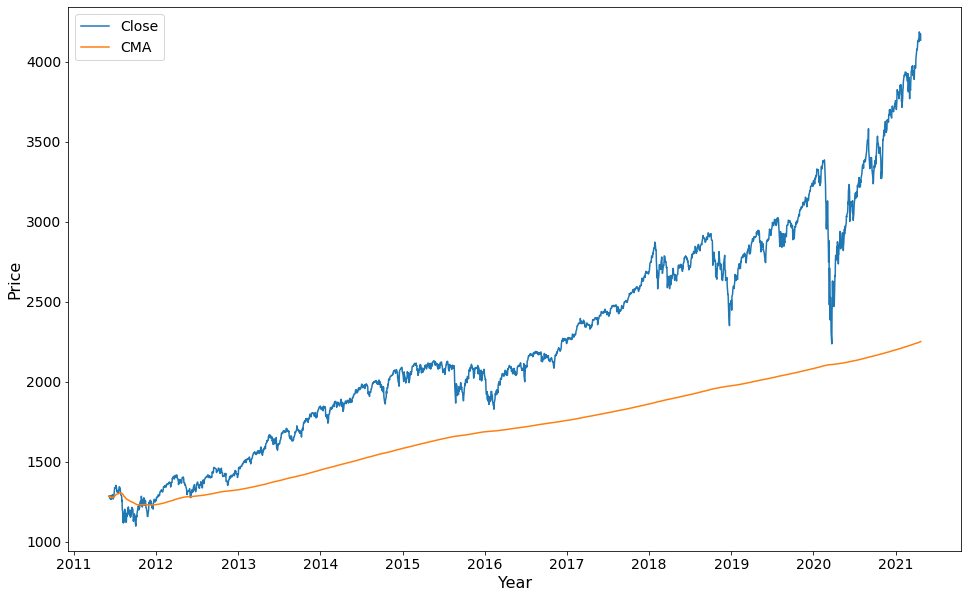

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'], label='Close')
plt.plot(data['CMA'], label='CMA')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

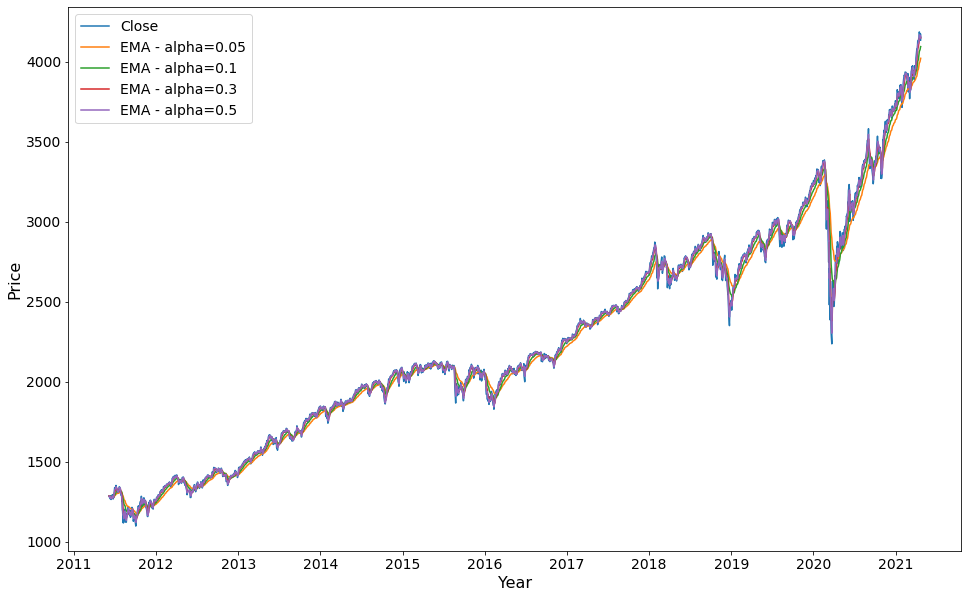

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'], label='Close')
plt.plot(data['EMA_0.05'], label='EMA - alpha=0.05')
plt.plot(data['EMA_0.1'], label='EMA - alpha=0.1')
plt.plot(data['EMA_0.3'], label='EMA - alpha=0.3')
plt.plot(data['EMA_0.5'], label='EMA - alpha=0.5')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# Moving Average Convergence Divergence
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
# Signal Line
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data.head()

,Date,Month,Weekday,Close,Low,High,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,SMA_5,SMA_10,SMA_20,SMA_60,SMA_120,SMA_240,CMA,EMA_0.05,EMA_0.1,EMA_0.3,EMA_0.5,MACD,Signal_Line
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-06,2011-06-06,6,1,1286.17,1284.72,1300.26,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1335.25,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,0.000000,0.000000
2011-06-07,2011-06-07,6,2,1284.94,1284.74,1296.22,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1286.108500,1286.047000,1285.801000,1285.555000,-0.098120,-0.019624
2011-06-08,2011-06-08,6,3,1279.56,1277.42,1287.04,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1285.781075,1285.398300,1283.928700,1282.557500,-0.603050,-0.136309
2011-06-09,2011-06-09,6,4,1289.00,1279.63,1294.54,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1285.942021,1285.758470,1285.450090,1285.778750,-0.238729,-0.156793
2011-06-10,2011-06-10,6,5,1270.98,1268.28,1288.60,1337.77,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1285.193920,1284.280623,1281.109063,1278.379375,-1.388065,-0.403048


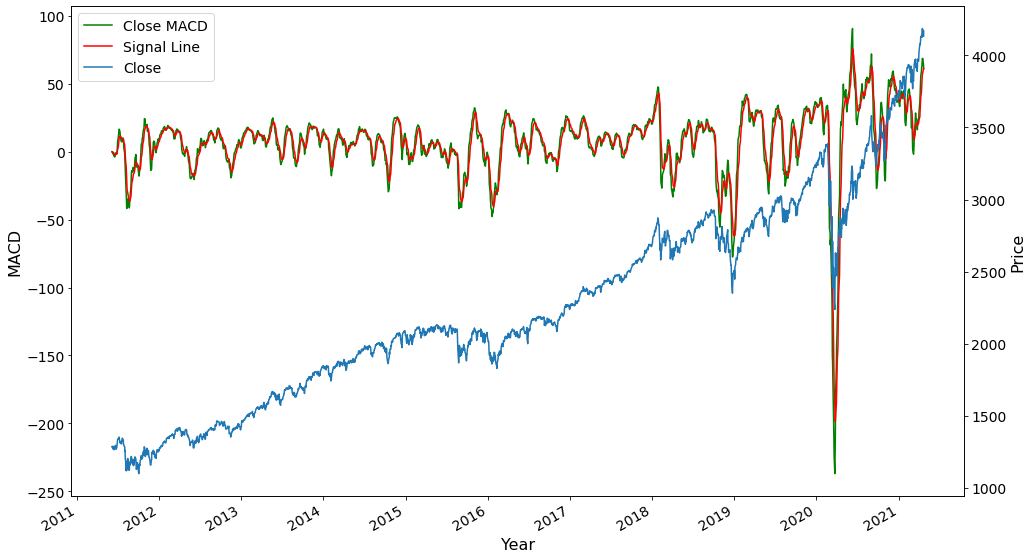

In [ ]:
plt.figure(figsize=(16,10))
data['MACD'].plot(label='Close MACD', color='green')
ax = data['Signal_Line'].plot(label='Signal Line', color='red')
data['Close'].plot(ax=ax, secondary_y=True, label='Close', fontsize=14)

ax.set_ylabel('MACD', fontsize=16)
ax.right_ax.set_ylabel('Price', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left', fontsize=14)
plt.show()

In [ ]:
from tapy import Indicators

# Williams Alligator Indicator
indicators = Indicators(data.reset_index(drop=True))
indicators.alligator()
indicators.df = indicators.df.fillna(method='bfill').set_index('Date')

data['alligator_jaws'] = indicators.df['alligator_jaws']
data['alligator_teeth'] = indicators.df['alligator_teeth']
data['alligator_lips'] = indicators.df['alligator_lips']
data = data.drop(columns=['Date'])
data = data.rename(columns={'Low': 'Bid', 'High': 'Ask'})
data.head()

,Month,Weekday,Close,Bid,Ask,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,SMA_5,SMA_10,SMA_20,SMA_60,SMA_120,SMA_240,CMA,EMA_0.05,EMA_0.1,EMA_0.3,EMA_0.5,MACD,Signal_Line,alligator_jaws,alligator_teeth,alligator_lips
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-06,6,1,1286.17,1284.72,1300.26,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1335.25,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,0.000000,0.000000,1281.054615,1282.41375,1286.145
2011-06-07,6,2,1284.94,1284.74,1296.22,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1286.108500,1286.047000,1285.801000,1285.555000,-0.098120,-0.019624,1281.054615,1282.41375,1286.145
2011-06-08,6,3,1279.56,1277.42,1287.04,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1285.781075,1285.398300,1283.928700,1282.557500,-0.603050,-0.136309,1281.054615,1282.41375,1286.145
2011-06-09,6,4,1289.00,1279.63,1294.54,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1285.942021,1285.758470,1285.450090,1285.778750,-0.238729,-0.156793,1281.054615,1282.41375,1286.145
2011-06-10,6,5,1270.98,1268.28,1288.60,1337.77,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1285.193920,1284.280623,1281.109063,1278.379375,-1.388065,-0.403048,1281.054615,1282.41375,1286.145


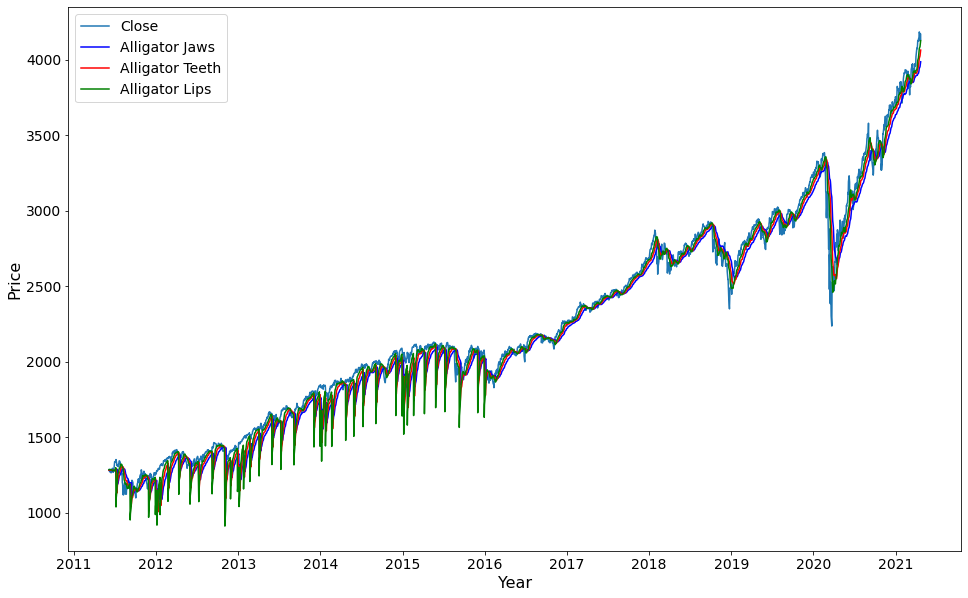

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'], label='Close')
plt.plot(data['alligator_jaws'], label='Alligator Jaws', color='blue')
plt.plot(data['alligator_teeth'], label='Alligator Teeth', color='red')
plt.plot(data['alligator_lips'], label='Alligator Lips', color='green')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
data.isna().sum()

Month              0
Weekday            0
Close              0
Bid                0
Ask                0
lag_20             0
lag_21             0
lag_22             0
lag_23             0
lag_24             0
lag_25             0
lag_26             0
lag_27             0
lag_28             0
lag_29             0
lag_30             0
SMA_5              0
SMA_10             0
SMA_20             0
SMA_60             0
SMA_120            0
SMA_240            0
CMA                0
EMA_0.05           0
EMA_0.1            0
EMA_0.3            0
EMA_0.5            0
MACD               0
Signal_Line        0
alligator_jaws     0
alligator_teeth    0
alligator_lips     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2529 entries, 2011-06-06 to 2021-04-22
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            2529 non-null   int64  
 1   Weekday          2529 non-null   int64  
 2   Close            2529 non-null   float64
 3   Bid              2529 non-null   float64
 4   Ask              2529 non-null   float64
 5   lag_20           2529 non-null   float64
 6   lag_21           2529 non-null   float64
 7   lag_22           2529 non-null   float64
 8   lag_23           2529 non-null   float64
 9   lag_24           2529 non-null   float64
 10  lag_25           2529 non-null   float64
 11  lag_26           2529 non-null   float64
 12  lag_27           2529 non-null   float64
 13  lag_28           2529 non-null   float64
 14  lag_29           2529 non-null   float64
 15  lag_30           2529 non-null   float64
 16  SMA_5            2529 non-null   float64
 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [ ]:
data.head()

,Month,Weekday,Close,Bid,Ask,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,SMA_5,SMA_10,SMA_20,SMA_60,SMA_120,SMA_240,CMA,EMA_0.05,EMA_0.1,EMA_0.3,EMA_0.5,MACD,Signal_Line,alligator_jaws,alligator_teeth,alligator_lips
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-06,6,1,1286.17,1284.72,1300.26,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1335.25,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,0.000000,0.000000,1281.054615,1282.41375,1286.145
2011-06-07,6,2,1284.94,1284.74,1296.22,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1286.108500,1286.047000,1285.801000,1285.555000,-0.098120,-0.019624,1281.054615,1282.41375,1286.145
2011-06-08,6,3,1279.56,1277.42,1287.04,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1285.781075,1285.398300,1283.928700,1282.557500,-0.603050,-0.136309,1281.054615,1282.41375,1286.145
2011-06-09,6,4,1289.00,1279.63,1294.54,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1285.942021,1285.758470,1285.450090,1285.778750,-0.238729,-0.156793,1281.054615,1282.41375,1286.145
2011-06-10,6,5,1270.98,1268.28,1288.60,1337.77,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1285.193920,1284.280623,1281.109063,1278.379375,-1.388065,-0.403048,1281.054615,1282.41375,1286.145


In [ ]:
train = data[:'2020']
test = data['2021':]

y_train = train['Close']
X_train = train.drop(columns=['Close'])

y_test = test['Close']
X_test = test.drop(columns=['Close'])

### TensorFlow LSTM (1 feature, 1 tick, without Attention)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
df = data[['Close']].reset_index(drop=True).copy()
df

,Close
0,1286.17
1,1284.94
2,1279.56
3,1289.00
4,1270.98
...,...
2524,4185.47
2525,4163.26
2526,4134.94
2527,4173.42


In [ ]:
training_set = df.iloc[:2481-lag+2].values
test_set = df.iloc[2481-lag+2:].values
training_set.shape, test_set.shape

((2453, 1), (76, 1))

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 2481-lag+2):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)

(2393, 60, 1) (2393,)


In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 6s 13ms/step - loss: 0.0411
Epoch 2/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 3/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 4/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 5/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0028
Epoch 6/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0025
Epoch 7/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0023
Epoch 8/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 9/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 10/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0023
Epoch 11/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 12/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 13/100
75/75 [=====

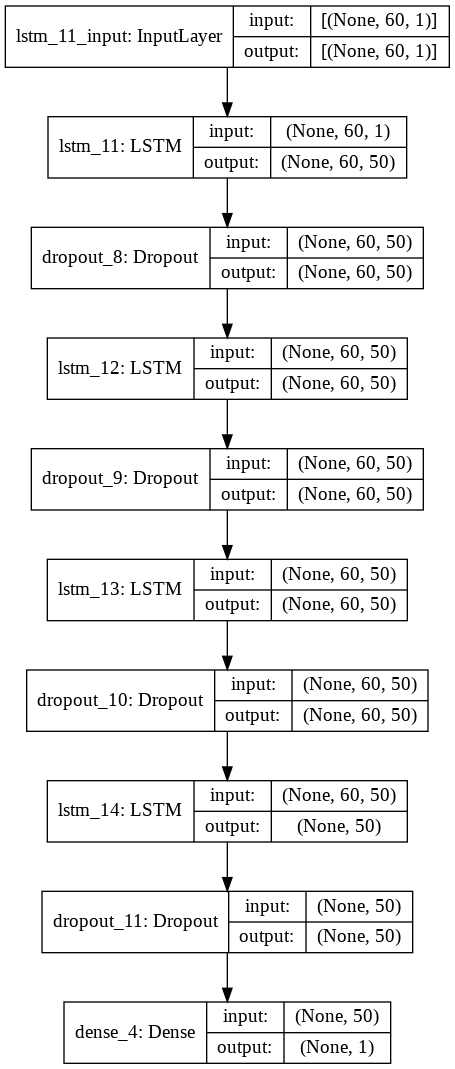

In [ ]:
from tensorflow.keras.utils import  plot_model

plot_model(model, to_file='LSTM_model.png', show_shapes=True)

In [ ]:
dataset_train = df.iloc[:2481-lag+2]
dataset_test = df.iloc[2481-lag+2:]

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
print(len(dataset_total), len(dataset_train), len(dataset_test))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape)

inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 136):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

2529 2453 76
(136, 1)
(136, 1)
(76, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
dataset_test.values.shape, predicted_stock_price.shape

((76, 1), (76, 1))

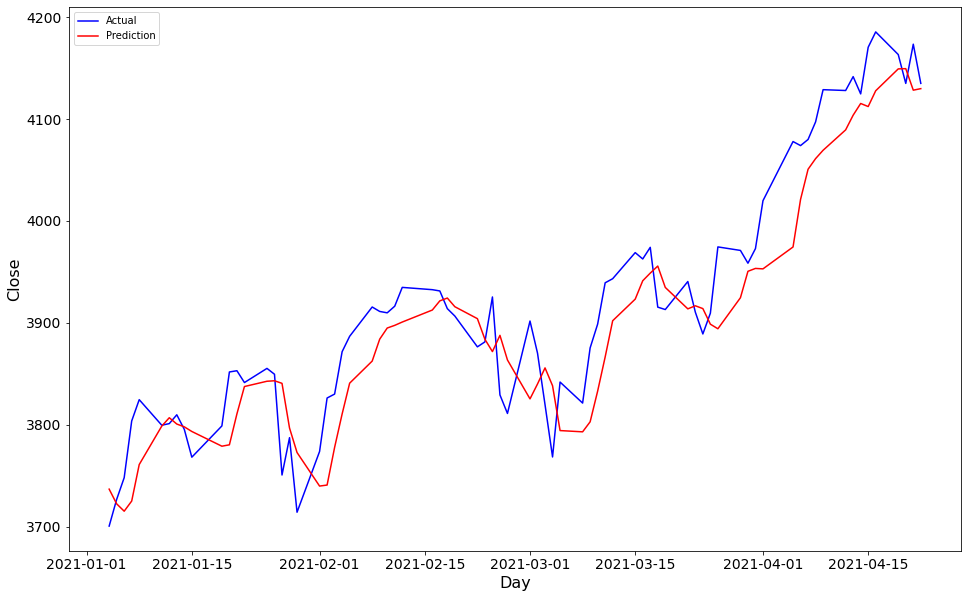

MAPE = 0.9378
MSE = 1967.9899
RMSE = 44.3620
MAE = 36.7201
R2 = 0.8671


In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, dataset_test.values, color = 'blue', label = 'Actual')
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price, color = 'red', label = 'Prediction')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

print("MAPE = %.4f" % mean_absolute_percentage_error(dataset_test.values, predicted_stock_price))
print("MSE = %.4f" % mean_squared_error(dataset_test.values, predicted_stock_price))
print("RMSE = %.4f" % root_mean_square_error(dataset_test.values, predicted_stock_price))
print("MAE = %.4f" % mean_absolute_error(dataset_test.values, predicted_stock_price))
print("R2 = %.4f" % r2_score(dataset_test.values, predicted_stock_price))

### TensorFlow LSTM (1 feature, 1 tick, with Attention)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model, Model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

tf.test.gpu_device_name()

''

In [ ]:
df = data[['Close']].reset_index(drop=True).copy()
df

,Close
0,1286.17
1,1284.94
2,1279.56
3,1289.00
4,1270.98
...,...
2524,4185.47
2525,4163.26
2526,4134.94
2527,4173.42


In [ ]:
training_set = df.iloc[:2481-lag+2].values
test_set = df.iloc[2481-lag+2:].values
training_set.shape, test_set.shape

((2453, 1), (76, 1))

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

for i in range(60, 2481-lag+2):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)

(2393, 60, 1) (2393,)


In [ ]:
class Attention(Layer):
    def __init__(self, units=128, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):
        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
model_input = Input(shape=(X_train.shape[1], 1))
x = LSTM(units = 50, return_sequences = True)(model_input)
x = Attention(units = 32)(x)
x = Dense(units = 1)(x)
model = Model(model_input, x)

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 4s 30ms/step - loss: 0.0308
Epoch 2/100
75/75 [==============================] - 2s 30ms/step - loss: 4.6371e-04
Epoch 3/100
75/75 [==============================] - 2s 30ms/step - loss: 4.3370e-04
Epoch 4/100
75/75 [==============================] - 2s 30ms/step - loss: 3.9748e-04
Epoch 5/100
75/75 [==============================] - 2s 30ms/step - loss: 4.3252e-04
Epoch 6/100
75/75 [==============================] - 2s 30ms/step - loss: 2.9235e-04
Epoch 7/100
75/75 [==============================] - 2s 30ms/step - loss: 3.0666e-04
Epoch 8/100
75/75 [==============================] - 2s 31ms/step - loss: 2.5701e-04
Epoch 9/100
75/75 [==============================] - 2s 31ms/step - loss: 2.0527e-04
Epoch 10/100
75/75 [==============================] - 2s 31ms/step - loss: 2.3342e-04
Epoch 11/100
75/75 [==============================] - 2s 31ms/step - loss: 1.9857e-04
Epoch 12/100
75/75 [==============================] - 2s 31ms/step 

In [ ]:
dataset_train = df.iloc[:2481-lag+2]
dataset_test = df.iloc[2481-lag+2:]

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
print(len(dataset_total), len(dataset_train), len(dataset_test))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape)

inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 136):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

2529 2453 76
(136, 1)
(136, 1)
(76, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
dataset_test.values.shape, predicted_stock_price.shape

((76, 1), (76, 1))

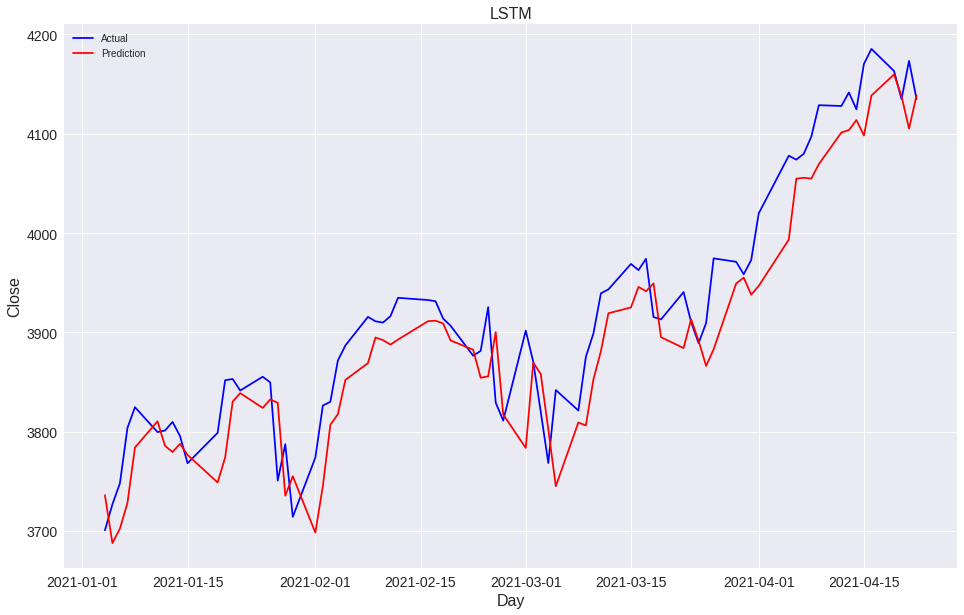

MAPE = 0.9481
MSE = 2086.4476
RMSE = 45.6776
MAE = 37.0705
R2 = 0.8591


In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, dataset_test.values, color = 'blue', label = 'Actual')
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price, color = 'red', label = 'Prediction')
plt.title('LSTM', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

print("MAPE = %.4f" % mean_absolute_percentage_error(dataset_test.values, predicted_stock_price))
print("MSE = %.4f" % mean_squared_error(dataset_test.values, predicted_stock_price))
print("RMSE = %.4f" % root_mean_square_error(dataset_test.values, predicted_stock_price))
print("MAE = %.4f" % mean_absolute_error(dataset_test.values, predicted_stock_price))
print("R2 = %.4f" % r2_score(dataset_test.values, predicted_stock_price))

### TensorFlow LSTM (N features, 1 tick, with Attention)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model, Model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
class Attention(Layer):
    def __init__(self, units=32, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):
        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
train = data[:'2020']
test = data['2021':]

data.head()

,Month,Weekday,Close,Bid,Ask,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,SMA_5,SMA_10,SMA_20,SMA_60,SMA_120,SMA_240,CMA,EMA_0.05,EMA_0.1,EMA_0.3,EMA_0.5,MACD,Signal_Line,alligator_jaws,alligator_teeth,alligator_lips
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-06,6,1,1286.17,1284.72,1300.26,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1335.25,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,1286.170000,0.000000,0.000000,1281.054615,1282.41375,1286.145
2011-06-07,6,2,1284.94,1284.74,1296.22,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1347.24,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1285.555000,1286.108500,1286.047000,1285.801000,1285.555000,-0.098120,-0.019624,1281.054615,1282.41375,1286.145
2011-06-08,6,3,1279.56,1277.42,1287.04,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1355.66,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1283.556667,1285.781075,1285.398300,1283.928700,1282.557500,-0.603050,-0.136309,1281.054615,1282.41375,1286.145
2011-06-09,6,4,1289.00,1279.63,1294.54,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1360.48,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1284.917500,1285.942021,1285.758470,1285.450090,1285.778750,-0.238729,-0.156793,1281.054615,1282.41375,1286.145
2011-06-10,6,5,1270.98,1268.28,1288.60,1337.77,1348.65,1342.08,1357.16,1346.29,1340.20,1335.10,1347.32,1356.62,1361.22,1363.61,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1282.130000,1285.193920,1284.280623,1281.109063,1278.379375,-1.388065,-0.403048,1281.054615,1282.41375,1286.145


In [ ]:
training_set = train.drop(columns=['Bid', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
test_set = test.drop(columns=['Bid', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
training_set.shape, test_set.shape

((2453, 1), (76, 1))

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

l = 60
for i in range(l, 2481-lag+2):
    X_train.append(training_set_scaled[i-l:i])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(2393, 60, 1) (2393,)


In [ ]:
model_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(units=50, return_sequences=True)(model_input)
x = Attention(units=32)(x)
x = Dense(units=1)(x)
model_close = Model(model_input, x)

model_close.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_close.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 2s 6ms/step - loss: 0.0281
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 9.0636e-04
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 7.7609e-04
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 5.6307e-04
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 5.1616e-04
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 4.5986e-04
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 3.3738e-04
Epoch 8/100
75/75 [==============================] - 0s 5ms/step - loss: 4.3168e-04
Epoch 9/100
75/75 [==============================] - 0s 5ms/step - loss: 3.1145e-04
Epoch 10/100
75/75 [==============================] - 0s 5ms/step - loss: 2.9946e-04
Epoch 11/100
75/75 [==============================] - 0s 5ms/step - loss: 2.6209e-04
Epoch 12/100
75/75 [==============================] - 0s 5ms/step - loss: 2.18

In [ ]:
dataset_train = train.drop(columns=['Bid', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
dataset_test = test.drop(columns=['Bid', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
print(dataset_total.shape)
print(len(dataset_total), len(dataset_train), len(dataset_test))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - l:]
print(inputs.shape)

inputs = sc.transform(inputs)

X_test = []
for i in range(l, 76+l):
    X_test.append(inputs[i-l:i])

X_test = np.array(X_test)
print(X_test.shape)

(2529, 1)
2529 2453 76
(136, 1)
(76, 60, 1)


In [ ]:
predicted_stock_price_close = model_close.predict(X_test)
print(predicted_stock_price_close.shape)
predicted_stock_price_close = sc.inverse_transform(np.tile(predicted_stock_price_close.reshape(-1,1), (1, X_train.shape[2])))
dataset_test_close = dataset_test['Close'].values
dataset_test_close.shape, predicted_stock_price_close.shape

(76, 1)


((76,), (76, 1))

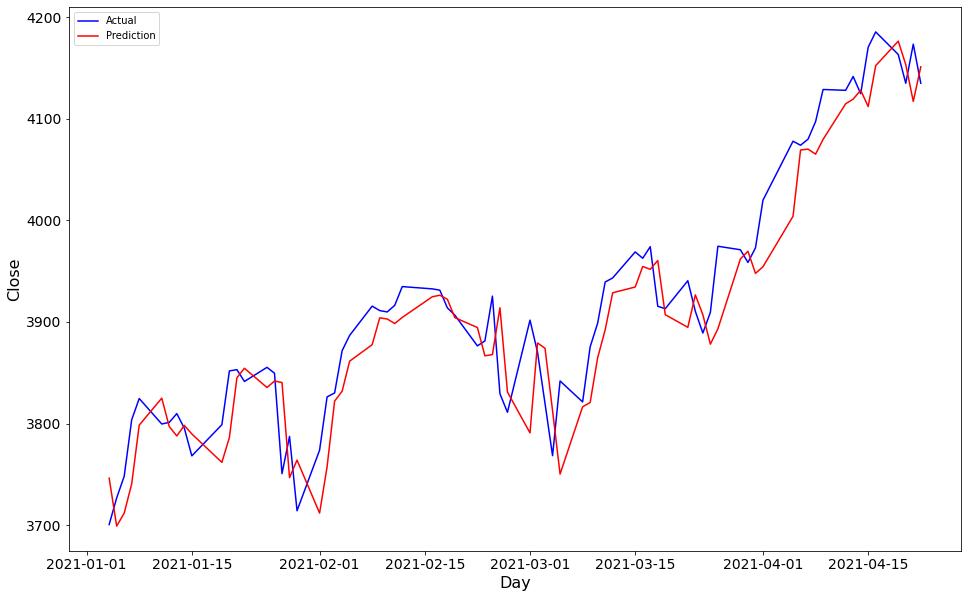

MAPE = 0.8153
MSE = 1629.9562
RMSE = 40.3727
MAE = 31.8095
R2 = 0.8899


In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, dataset_test_close, color = 'blue', label = 'Actual')
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price_close[:,0], color = 'red', label = 'Prediction')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

print("MAPE = %.4f" % mean_absolute_percentage_error(dataset_test_close, predicted_stock_price_close[:,0]))
print("MSE = %.4f" % mean_squared_error(dataset_test_close, predicted_stock_price_close[:,0]))
print("RMSE = %.4f" % root_mean_square_error(dataset_test_close, predicted_stock_price_close[:,0]))
print("MAE = %.4f" % mean_absolute_error(dataset_test_close, predicted_stock_price_close[:,0]))
print("R2 = %.4f" % r2_score(dataset_test_close, predicted_stock_price_close[:,0]))

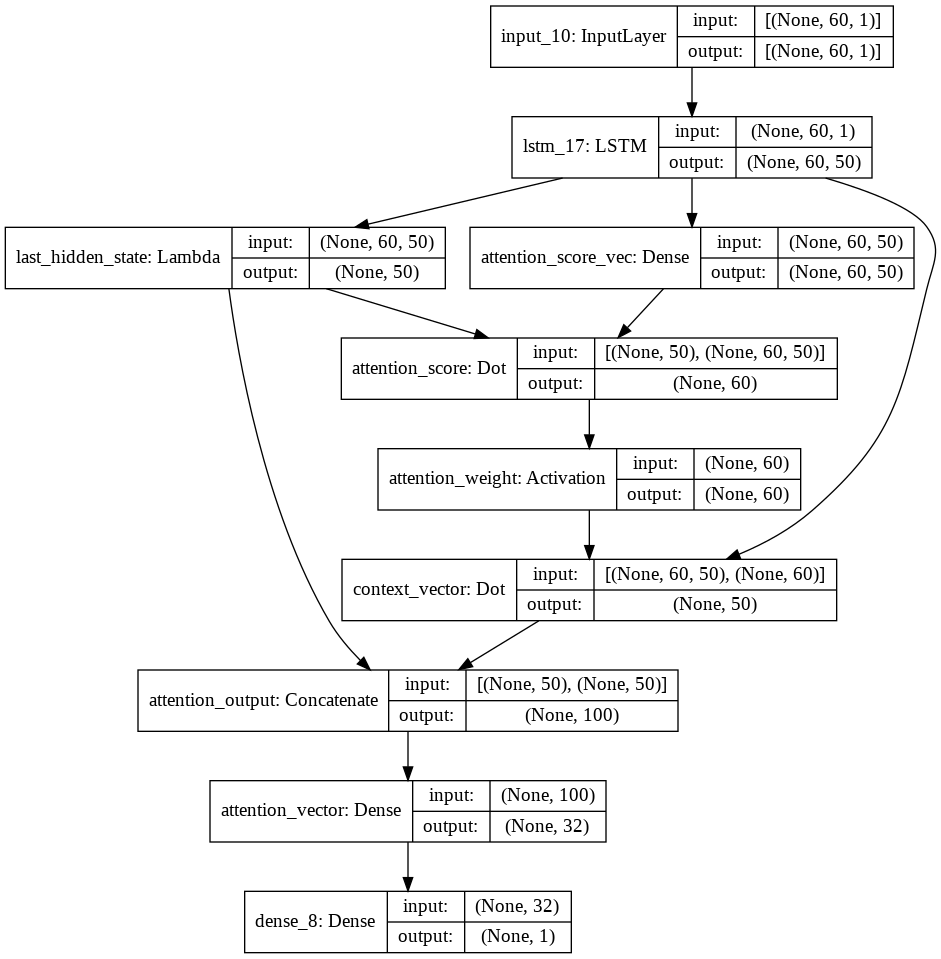

In [ ]:
from tensorflow.keras.utils import  plot_model

plot_model(model_close, to_file='LSTM_model.png', show_shapes=True)

### Cost of Liquidity

#### Bid

In [ ]:
training_set = train.drop(columns=['Close', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
test_set = test.drop(columns=['Close', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
training_set.shape, test_set.shape

((2453, 1), (76, 1))

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

l = 60
for i in range(l, 2481-lag+2):
    X_train.append(training_set_scaled[i-l:i])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(2393, 60, 1) (2393,)


In [ ]:
model_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(units=50, return_sequences=True)(model_input)
x = Attention(units=32)(x)
x = Dense(units=1)(x)
model_bid = Model(model_input, x)

model_bid.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_bid.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 2s 7ms/step - loss: 0.1001
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 4/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 8/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 9/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 10/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 11/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 12/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 13/100
75/75 [=================

In [ ]:
dataset_train = train.drop(columns=['Close', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
dataset_test = test.drop(columns=['Close', 'Ask', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
print(dataset_total.shape)
print(len(dataset_total), len(dataset_train), len(dataset_test))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - l:]
print(inputs.shape)

inputs = sc.transform(inputs)

X_test = []
for i in range(l, 76+l):
    X_test.append(inputs[i-l:i])

X_test = np.array(X_test)
print(X_test.shape)

(2529, 1)
2529 2453 76
(136, 1)
(76, 60, 1)


In [ ]:
predicted_stock_price_bid = model_bid.predict(X_test)
predicted_stock_price_bid = sc.inverse_transform(np.tile(predicted_stock_price_bid.reshape(-1,1), (1, X_train.shape[2])))
dataset_test_bid = dataset_test['Bid'].values
dataset_test_bid.shape, predicted_stock_price_bid.shape

((76,), (76, 1))

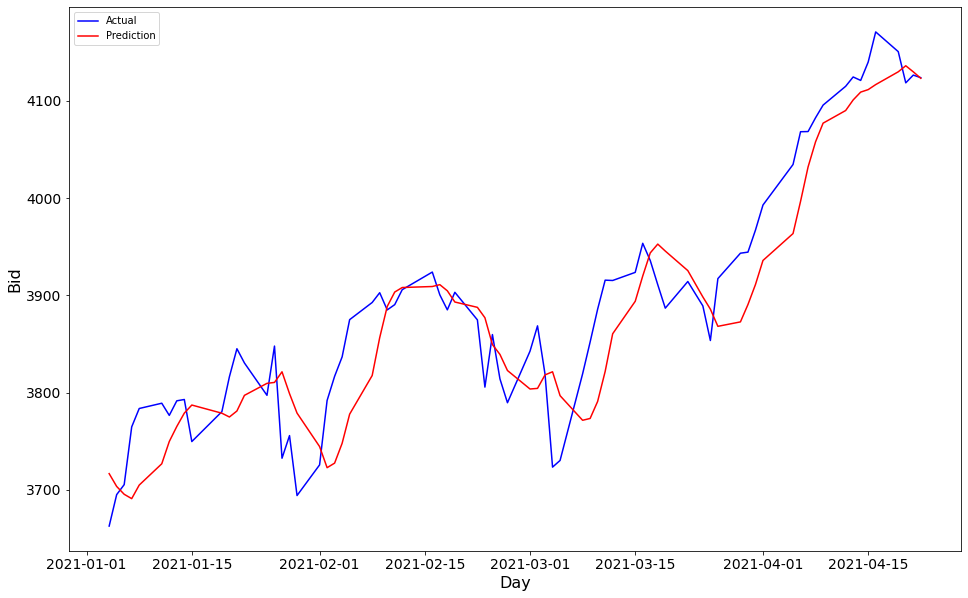

MAPE = 1.0466
MSE = 2444.8632
RMSE = 49.4456
MAE = 40.4767
R2 = 0.8444


In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, dataset_test_bid, color = 'blue', label = 'Actual')
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price_bid[:,0], color = 'red', label = 'Prediction')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Bid', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

print("MAPE = %.4f" % mean_absolute_percentage_error(dataset_test_bid, predicted_stock_price_bid[:,0]))
print("MSE = %.4f" % mean_squared_error(dataset_test_bid, predicted_stock_price_bid[:,0]))
print("RMSE = %.4f" % root_mean_square_error(dataset_test_bid, predicted_stock_price_bid[:,0]))
print("MAE = %.4f" % mean_absolute_error(dataset_test_bid, predicted_stock_price_bid[:,0]))
print("R2 = %.4f" % r2_score(dataset_test_bid, predicted_stock_price_bid[:,0]))

#### Ask

In [ ]:
training_set = train.drop(columns=['Close', 'Bid', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
test_set = test.drop(columns=['Close', 'Bid', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
training_set.shape, test_set.shape

((2453, 1), (76, 1))

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

l = 60
for i in range(l, 2481-lag+2):
    X_train.append(training_set_scaled[i-l:i])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(2393, 60, 1) (2393,)


In [ ]:
model_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(units=50, return_sequences=True)(model_input)
x = Attention(units=32)(x)
x = Dense(units=1)(x)
model_ask = Model(model_input, x)

model_ask.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_ask.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 2s 7ms/step - loss: 0.0609
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 3/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 4/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 8/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 9/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 10/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 11/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 12/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 13/100
75/75 [=================

In [ ]:
dataset_train = train.drop(columns=['Close', 'Bid', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()
dataset_test = test.drop(columns=['Close', 'Bid', 'Month', 'Weekday', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240', 'CMA', 'EMA_0.05', 'EMA_0.1', 'EMA_0.3', 'EMA_0.5', 'MACD', 'Signal_Line', 'alligator_jaws', 'alligator_teeth', 'alligator_lips']).reset_index(drop=True).copy()

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
print(dataset_total.shape)
print(len(dataset_total), len(dataset_train), len(dataset_test))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - l:]
print(inputs.shape)

inputs = sc.transform(inputs)

X_test = []
for i in range(l, 76+l):
    X_test.append(inputs[i-l:i])

X_test = np.array(X_test)
print(X_test.shape)

(2529, 1)
2529 2453 76
(136, 1)
(76, 60, 1)


In [ ]:
predicted_stock_price_ask = model_ask.predict(X_test)
predicted_stock_price_ask = sc.inverse_transform(np.tile(predicted_stock_price_ask.reshape(-1,1), (1, X_train.shape[2])))
dataset_test_ask = dataset_test['Ask'].values
dataset_test_ask.shape, predicted_stock_price_ask.shape

((76,), (76, 1))

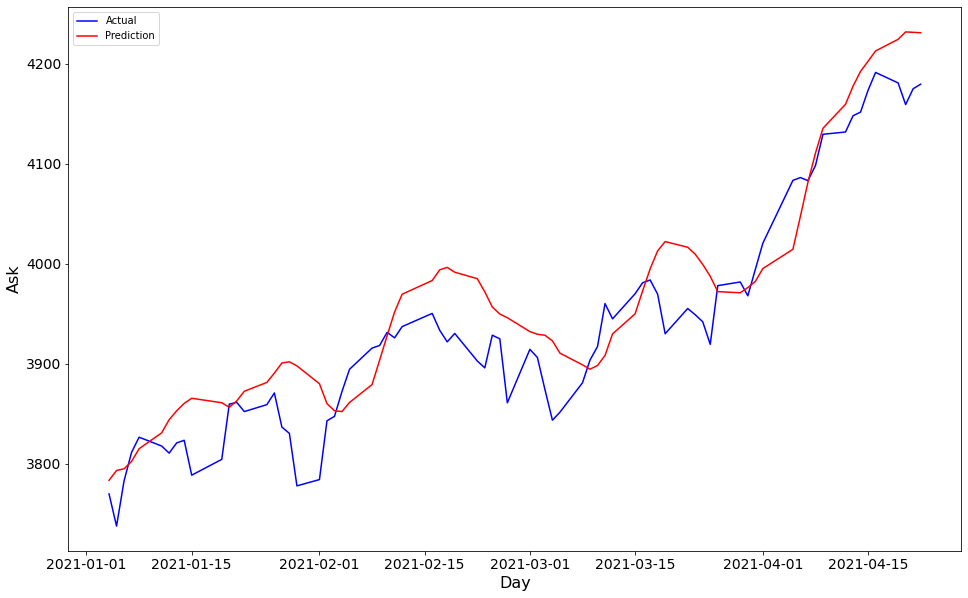

MAPE = 0.9437
MSE = 2097.0279
RMSE = 45.7933
MAE = 37.0236
R2 = 0.8402


In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, dataset_test_ask, color = 'blue', label = 'Actual')
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price_ask[:,0], color = 'red', label = 'Prediction')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Ask', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

print("MAPE = %.4f" % mean_absolute_percentage_error(dataset_test_ask, predicted_stock_price_ask[:,0]))
print("MSE = %.4f" % mean_squared_error(dataset_test_ask, predicted_stock_price_ask[:,0]))
print("RMSE = %.4f" % root_mean_square_error(dataset_test_ask, predicted_stock_price_ask[:,0]))
print("MAE = %.4f" % mean_absolute_error(dataset_test_ask, predicted_stock_price_ask[:,0]))
print("R2 = %.4f" % r2_score(dataset_test_ask, predicted_stock_price_ask[:,0]))

#### CoL

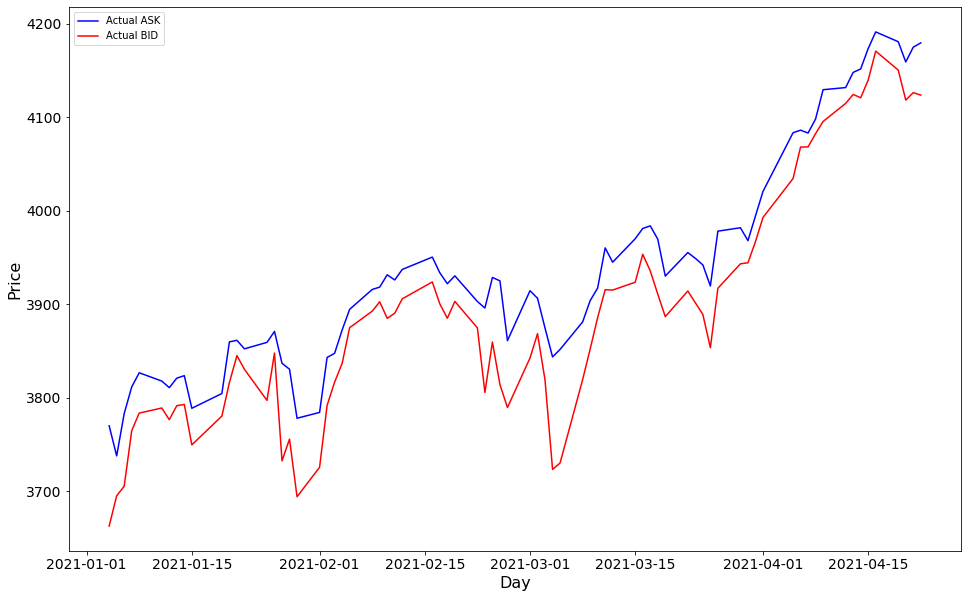

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, dataset_test_ask, color = 'blue', label = 'Actual ASK')
plt.plot(data.iloc[2481-lag+2:].index, dataset_test_bid, color = 'red', label = 'Actual BID')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

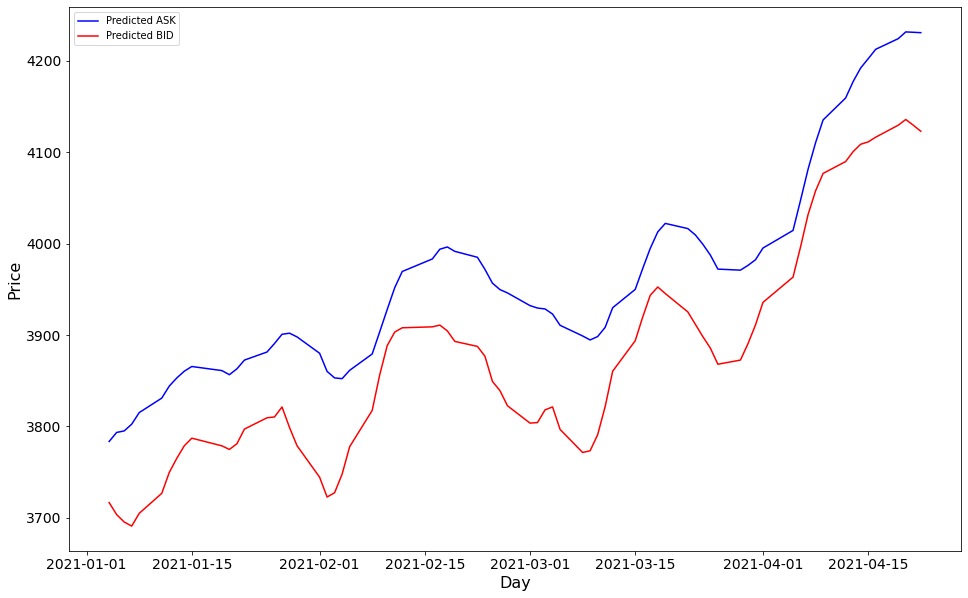

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price_ask, color = 'blue', label = 'Predicted ASK')
plt.plot(data.iloc[2481-lag+2:].index, predicted_stock_price_bid, color = 'red', label = 'Predicted BID')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

In [ ]:
def get_stats(data_ask, data_bid, start_size, lambd=0.97):
    spread = (data_ask - data_bid)
    mid = (data_ask + data_bid) / 2
    relative_spread = spread / mid
    ret = np.log(mid[:-1]) - np.log(mid[1:])

    sigma_return = np.std(ret[:start_size])
    mean_return = np.mean(ret[:start_size])
    
    sigma_relative_spread = np.std(relative_spread[:start_size])
    mean_relative_spread = np.mean(relative_spread[:start_size])
    
    last_mid = mid[start_size - 1]
    
    stats = pd.DataFrame()

    for i in range(start_size, len(data_ask) - 1):
        min_price = last_mid * (np.exp(mean_return - sigma_return * scipy.stats.norm.ppf(0.99)))
        var = last_mid - min_price
        col = 0.5 * (last_mid * (mean_relative_spread + sigma_relative_spread * scipy.stats.norm.ppf(0.99)))
        adj_var = var + col
        liquidity_part = col / adj_var

        stats = stats.append({
            'sigma_return': sigma_return,
            'mean_return': mean_return,
            'sigma_relative_spread': sigma_relative_spread,
            'mean_relative_spread': mean_relative_spread,
            'last_mid': last_mid,
            'var': var,
            'col': col,
            'adj_var': adj_var,
            'liquidity_part': liquidity_part
        }, ignore_index=True)
        
        mean_return = lambd * mean_return + (1 - lambd) * ret[i]
        sigma_return = np.sqrt(lambd * sigma_return ** 2 + (1 - lambd) * (ret[i] - mean_return) ** 2)
        
        mean_relative_spread = lambd * mean_relative_spread + (1 - lambd) * relative_spread[i]
        sigma_relative_spread = np.sqrt(lambd * sigma_relative_spread ** 2 + (1 - lambd) * (relative_spread[i] - mean_relative_spread) ** 2)
        
        last_mid = mid[i]

    return stats

In [ ]:
start_size = 30
stats_actual = get_stats(dataset_test_ask, dataset_test_bid, start_size)
stats_pred = get_stats(predicted_stock_price_ask[:,0], predicted_stock_price_bid[:,0], start_size)

stats_actual.index = data.iloc[2481-lag+2+start_size+1:].index
stats_pred.index = data.iloc[2481-lag+2+start_size+1:].index

stats_actual.head()

,adj_var,col,last_mid,liquidity_part,mean_relative_spread,mean_return,sigma_relative_spread,sigma_return,var
Date,,,,,,,,,
2021-02-18,125.972766,52.210546,3937.140,0.414459,0.011481,-0.001753,0.006466,0.007376,73.762220
2021-02-19,123.670233,51.412977,3917.020,0.415726,0.011390,-0.001597,0.006388,0.007317,72.257257
2021-02-22,122.005641,50.722220,3903.505,0.415737,0.011333,-0.001650,0.006300,0.007213,71.283421
2021-02-23,121.297762,50.400328,3916.740,0.415509,0.011202,-0.001386,0.006248,0.007256,70.897435
2021-02-24,119.846826,49.544818,3888.815,0.413401,0.011084,-0.001050,0.006189,0.007391,70.302008


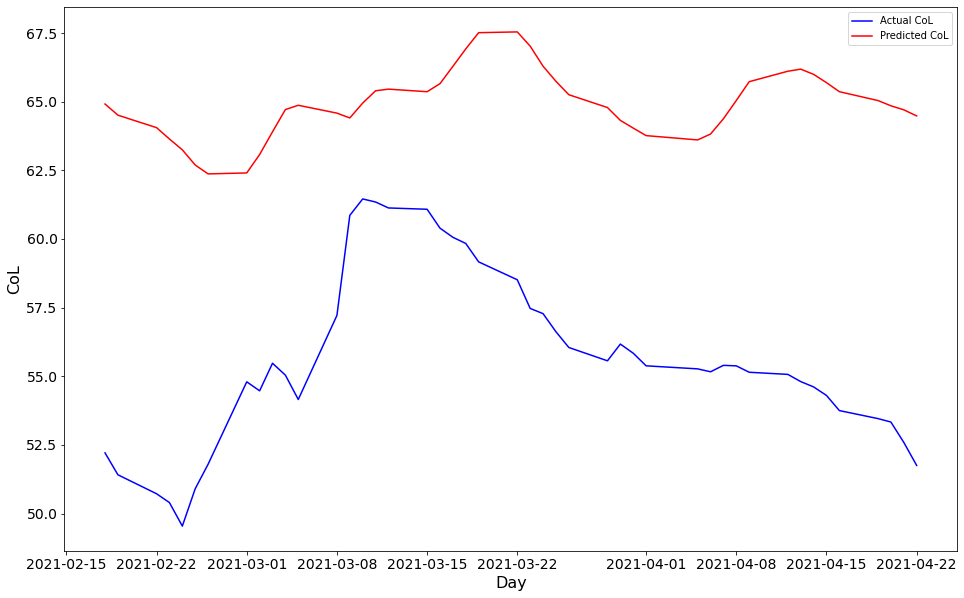

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(stats_actual.index, stats_actual['col'], color = 'blue', label = 'Actual CoL')
plt.plot(stats_pred.index, stats_pred['col'], color = 'red', label = 'Predicted CoL')
plt.xlabel('Day', fontsize=16)
plt.ylabel('CoL', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()